## Nama : Ahmad Jalu Fahreza Nur Hakim
## NIM  : H071201057

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Clasification

In [3]:
data1 = pd.read_csv('Data/diabetes_data_upload.csv')

## Data Cleaning

In [4]:
# Mengubah data categorical menjadi numerik menggunakan label encoder
le = LabelEncoder()
for column in data1.columns:
    if data1[column].dtype == type(object):
        data1[column] = le.fit_transform(data1[column])

In [5]:
x = data1.drop('class', axis=1)
y = data1['class']

In [6]:
x.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [7]:
data1.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

## Visualisasi Data

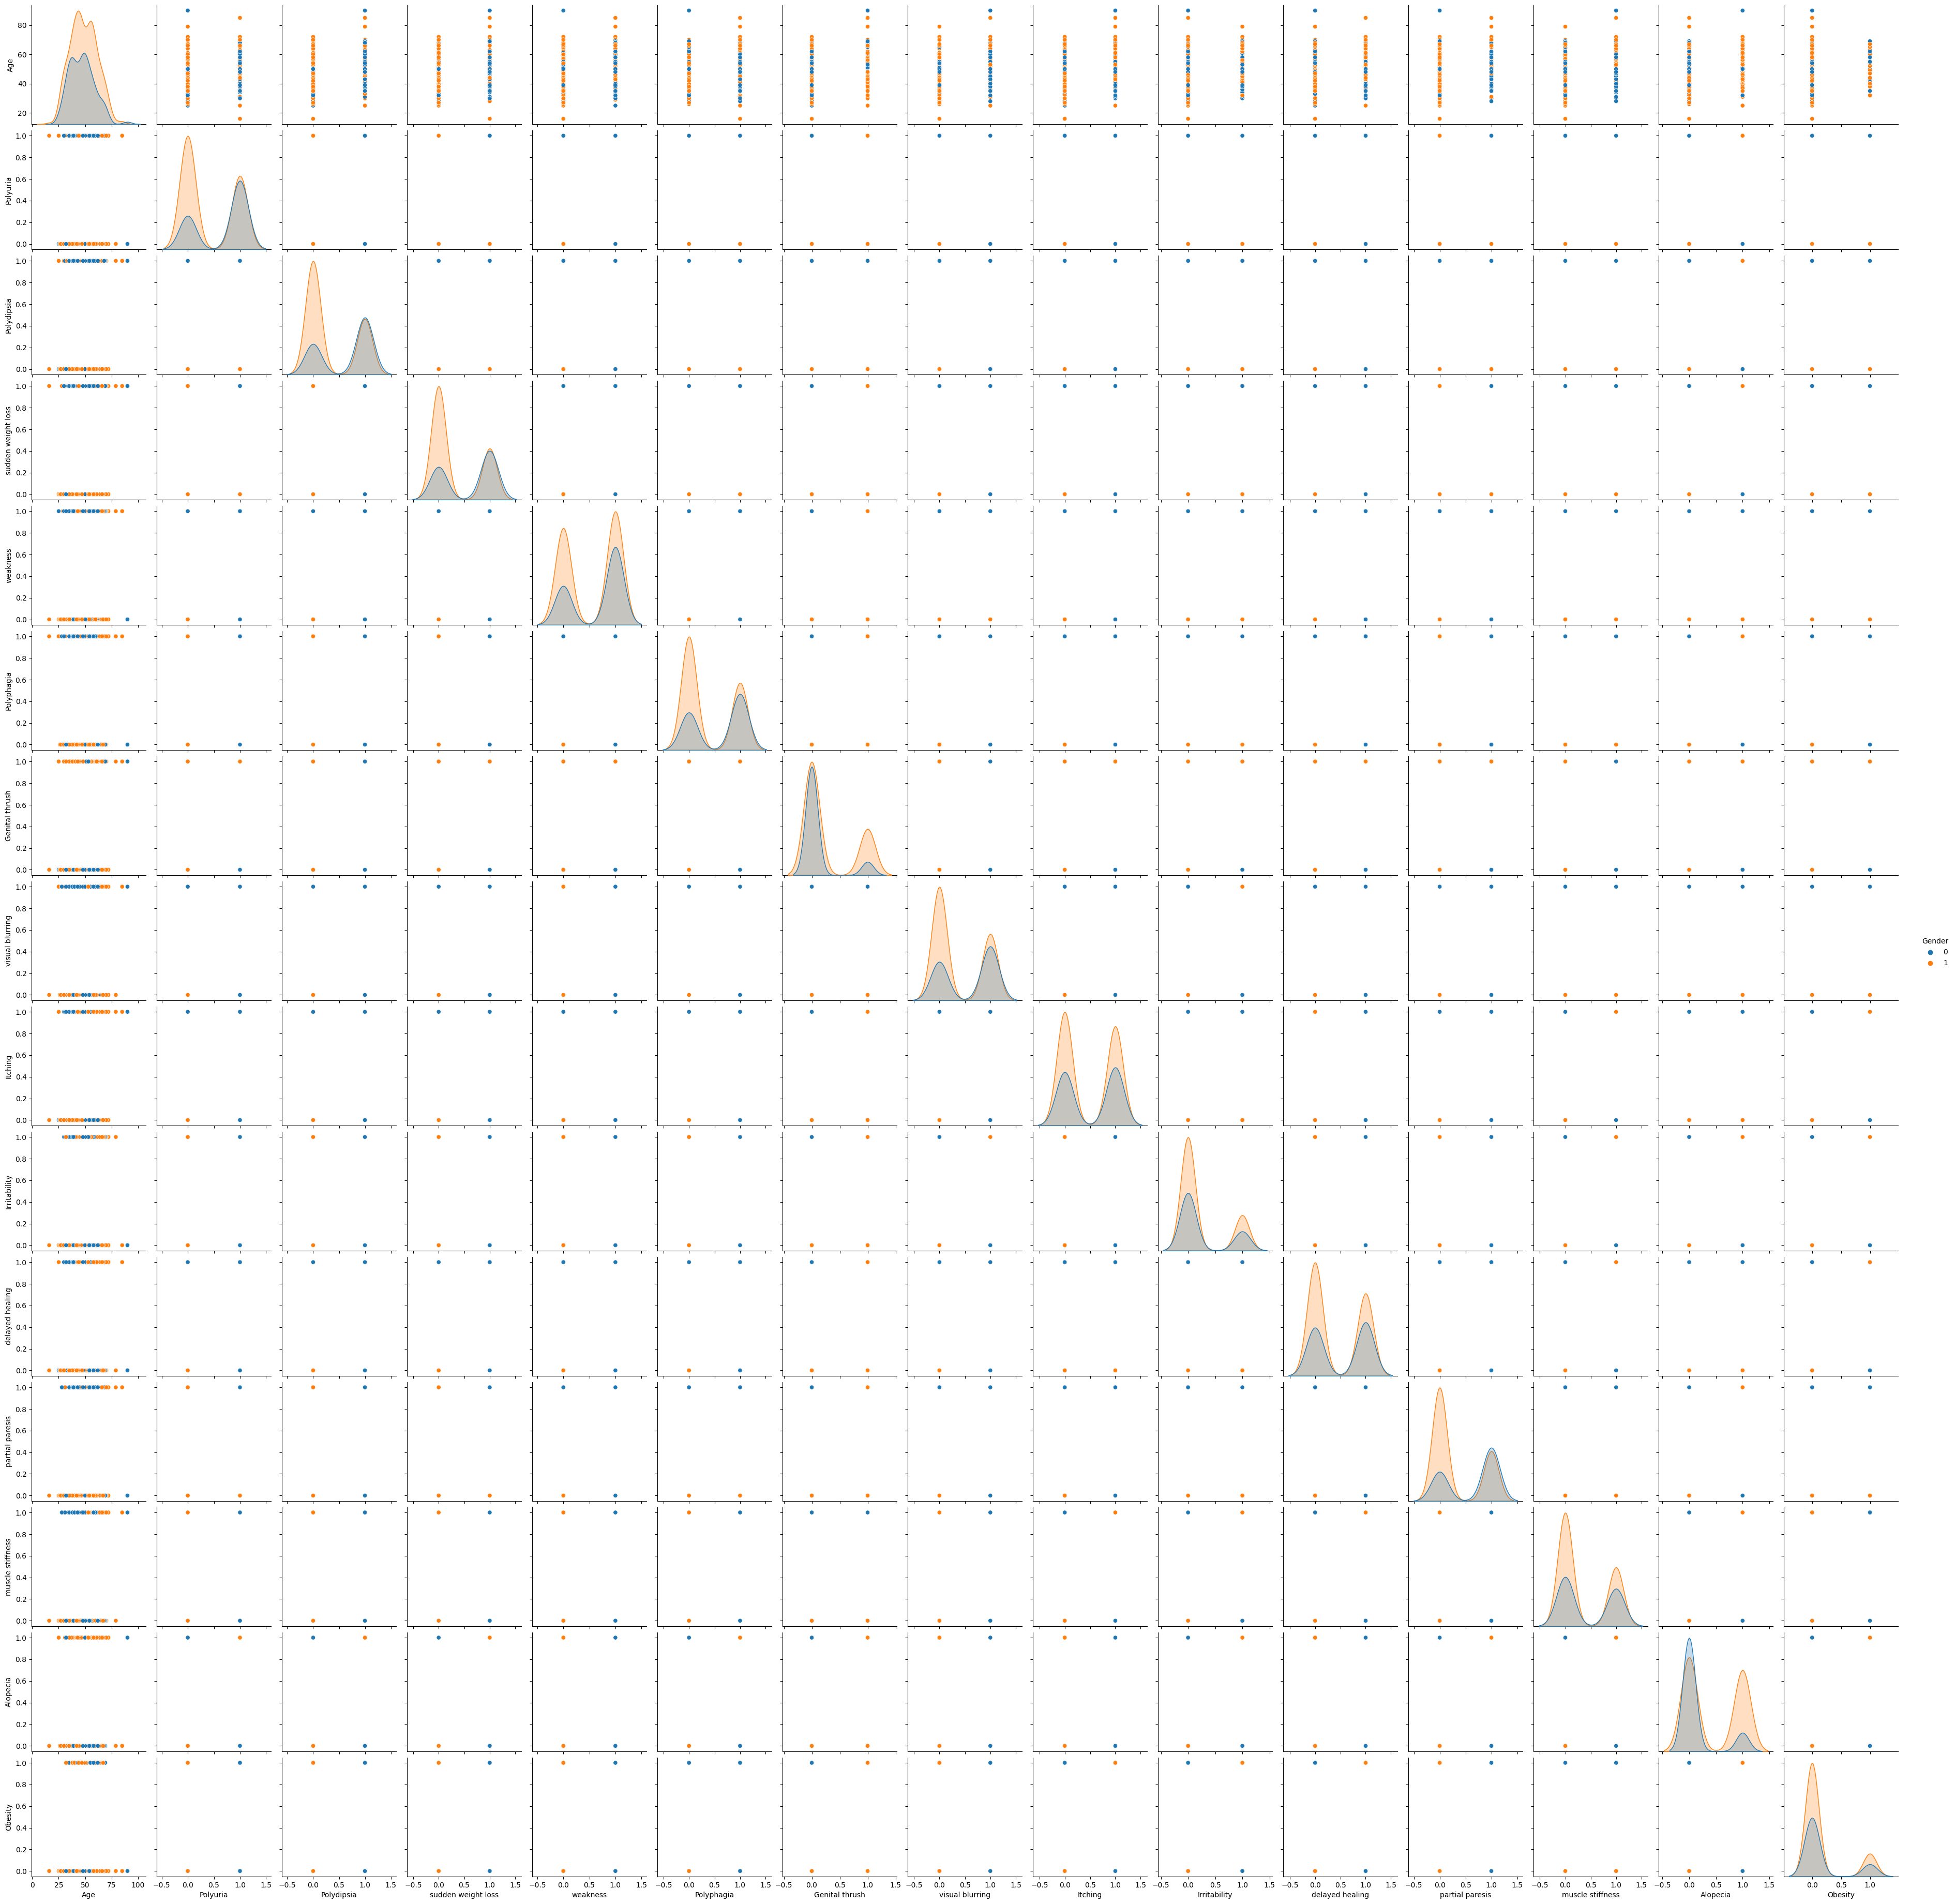

In [10]:
# Visualisasi Secara keseluruhan
sns.pairplot(x, hue='Gender')
plt.show()

Text(0, 0.5, 'Kegemukan')

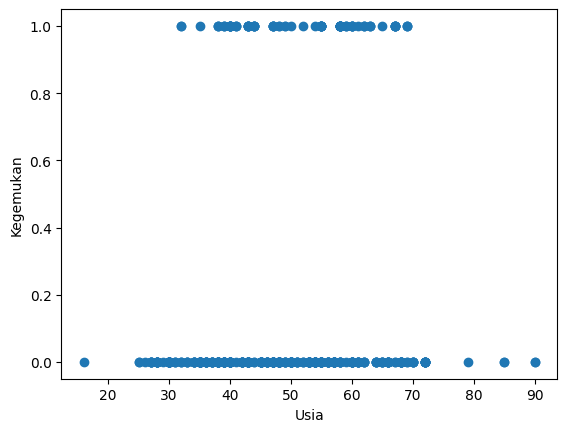

In [11]:
plt.scatter(x['Age'], x['Obesity'])

# memberi label pada sumbu x dan y
plt.xlabel('Usia')
plt.ylabel('Kegemukan')

## Split dan Training Data

In [15]:
from sklearn.model_selection import train_test_split


# Memisahkan dataset menjadi data training dan testing
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Membuat knn classifier
knn = KNeighborsClassifier()

# Membuat Decision tree classifier
dt = DecisionTreeClassifier()

# Membuat Naive bayes classifier
nb = GaussianNB()


# Train Models
knn.fit(x_train, y_train)
dt.fit(x_train, y_train)
nb.fit(x_train, y_train)

GaussianNB()

## Akurasi dari setiap algoritma

In [18]:
from sklearn.metrics import accuracy_score

# Test models
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
nb_pred = nb.predict(x_test)

# Menghitung accuracy
knn_acc = accuracy_score(y_test, knn_pred)
dt_acc = accuracy_score(y_test, dt_pred)
nb_acc = accuracy_score(y_test, nb_pred)

# Print accuracy
print("KNN accuracy:", knn_acc)
print("Decision Tree accuracy:", dt_acc)
print("Naive Bayes accuracy:", nb_acc)

KNN accuracy: 0.8557692307692307
Decision Tree accuracy: 0.9423076923076923
Naive Bayes accuracy: 0.9134615384615384


## KESIMPULAN
Berdasarkan hasil training pada data diabetes_data_upload menggunakan tiga algoritma klasifikasi yang berbeda, dapat disimpulkan bahwa:


1.   K-Nearest Neighbors (KNN) memiliki akurasi sekitar 85%, yang berarti model tersebut dapat memprediksi dengan benar sekitar 85% dari pasien yang terdiagnosis diabetes atau tidak. Algoritma KNN mengklasifikasikan data berdasarkan jarak antara data uji dan data latih terdekat, sehingga cocok digunakan pada data yang memiliki karakteristik terdistribusi secara lokal.
2.   Decision Tree memiliki akurasi sekitar 94%, yang berarti model tersebut dapat memprediksi dengan benar sekitar 94% dari pasien yang terdiagnosis diabetes atau tidak. Algoritma Decision Tree bekerja dengan membuat pohon keputusan yang membagi data berdasarkan fitur yang paling penting dan menghasilkan kelas prediksi pada daun pohon tersebut. Algoritma ini cocok digunakan pada data yang memiliki karakteristik dengan banyak fitur.
3.   Naive Bayes memiliki akurasi sekitar 91%, yang berarti model tersebut dapat memprediksi dengan benar sekitar 91% dari pasien yang terdiagnosis diabetes atau tidak. Algoritma Naive Bayes menggunakan teorema Bayes dan mengasumsikan bahwa setiap fitur independen secara statistik, sehingga cocok digunakan pada data yang memiliki banyak fitur.


